## microrender

In this notebook we show how to use the microrender library to load a set of vertices and rotate them in 3D.

### Rendering a 3D model

In [134]:
import numpy as np

from microrender import Window, Vertices, Quaternion, Matrix

n = 350
window = Window(n, n)
rotation_axis, angle = np.array([1.0, 0.0, 0.0]), 0.1
vertices = Vertices.from_ply(
    R"test/models/Armadillo.ply", scale=0.005, shift=[0, -0.125, 0], voxel_size=3
)
print(f'Loaded {len(vertices)} 3d points in memory')
rotatable = Quaternion.rotatable([0.0, 0.0, 1.0], np.pi / 2)
vertices.rotate(rotatable)  # align in front of view

Loaded 5792 3d points in memory


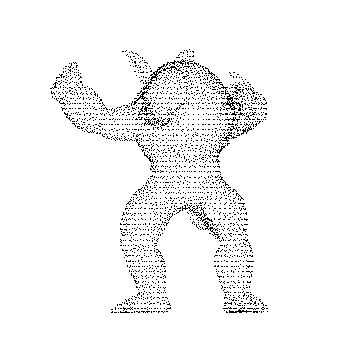

In [137]:
from IPython.display import clear_output
from PIL import Image
import time


def render():
    image = Image.fromarray(window.render(vertices))
    display(image)
    vertices.rotate(rotatable)
    clear_output(wait=True)
    time.sleep(1.0 / 30) # 60 FPS


rotatable = Quaternion.rotatable(rotation_axis, angle)
for _ in range(150):
    render()

### Comparing Matrix and Quaternion rotation performance

In [138]:
rotatable = Matrix.rotatable(rotation_axis, angle)
%timeit vertices.rotate(rotatable)

17.2 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [139]:
rotatable = Quaternion.rotatable(rotation_axis, angle)
%timeit vertices.rotate(rotatable)

18.9 µs ± 3.82 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
